In [39]:
import json
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy

max gap between two points in x: 877.0360409999998
center of the path: (-1.6230470000000423, 9.10386650000001)


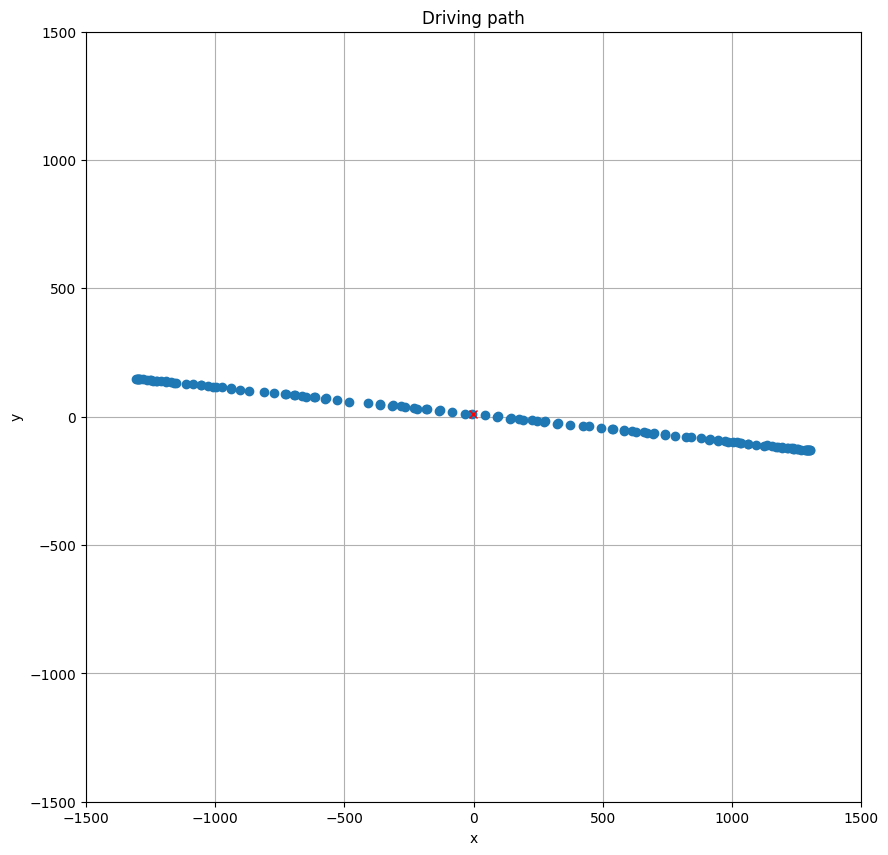

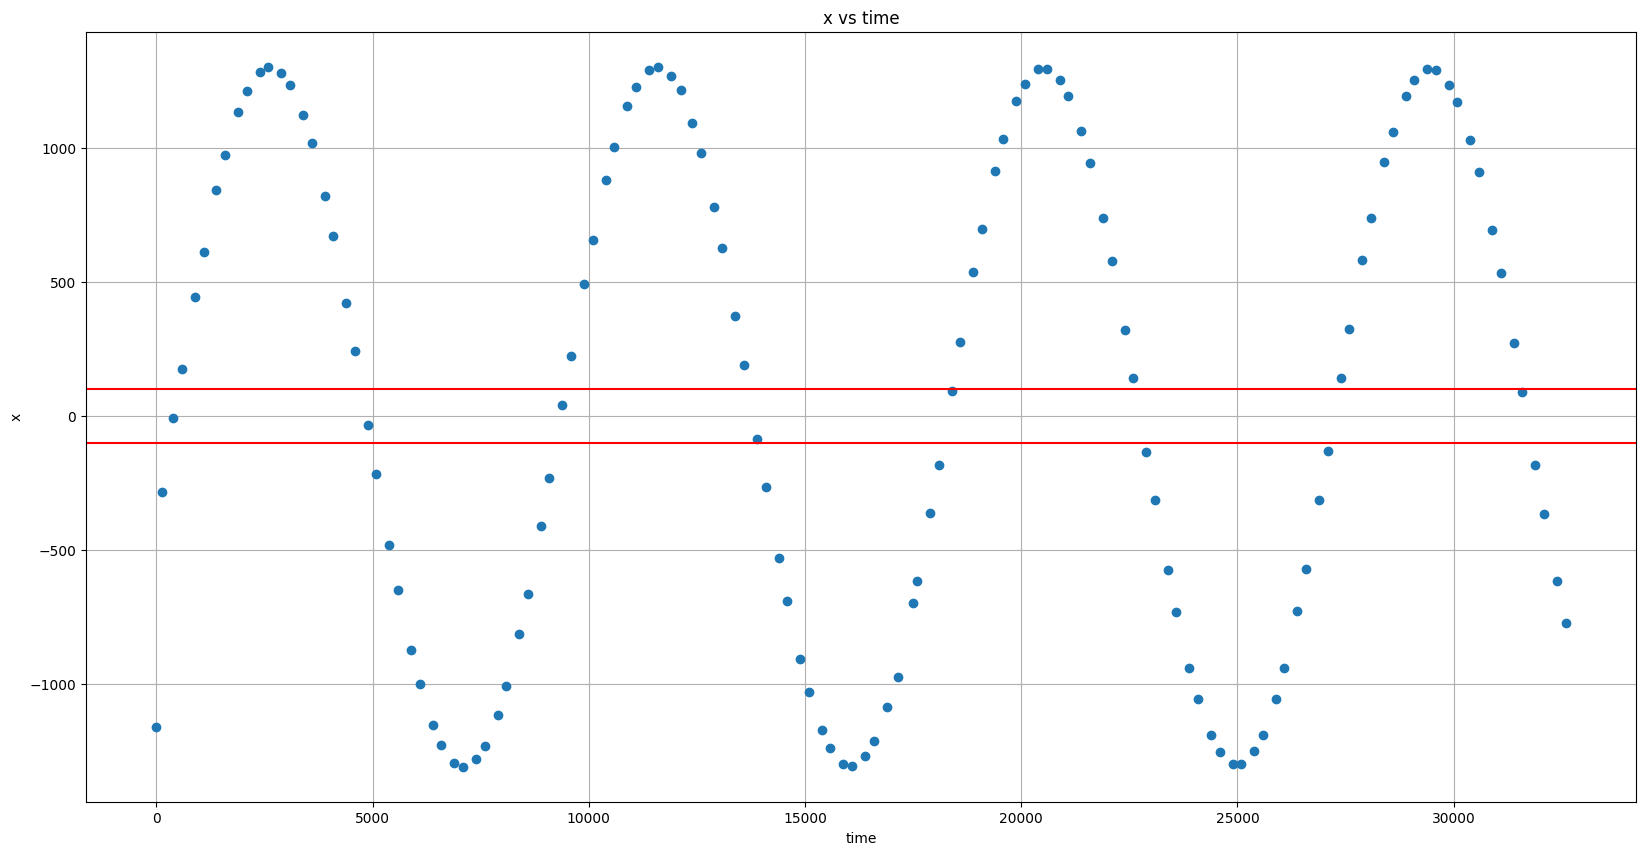

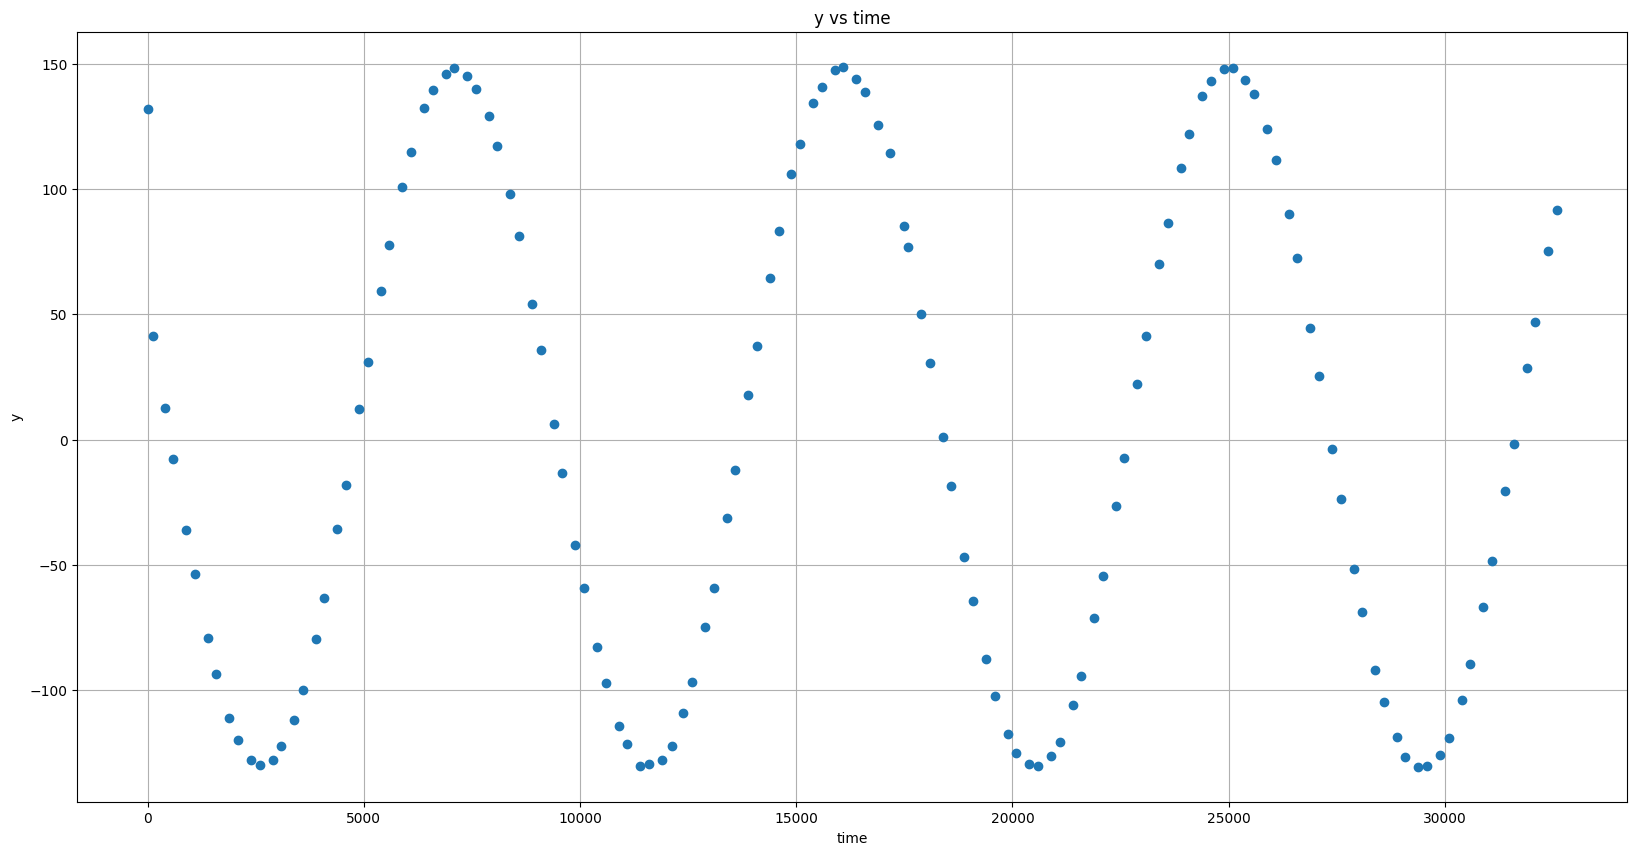

132


In [77]:
with open('mesure1.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
x = []
y = []
time = []
for i in range(len(data)):
    x.append(float(data[i][0]))
    y.append(float(data[i][1]))
    t = data[i][2].split(' ')[1]
    heures, minutes, secondes = t.split(":")
    secondes, millisecondes = secondes.split(".")
    heures_ms = int(heures) * 60 * 60 * 1000
    minutes_ms = int(minutes) * 60 * 1000
    secondes_ms = int(secondes) * 1000
    millisecondes = int(millisecondes)
    total_ms = heures_ms + minutes_ms + secondes_ms + millisecondes
    time.append(total_ms)

time = np.array(time)
time = time - time[0]

# print the max gap between two points in x
maxGap = 0
for i in range(len(x)-1):
    gap = abs(x[i+1]-x[i])
    if gap > maxGap:
        maxGap = gap
print(f"max gap between two points in x: {maxGap}")

xCenter = (np.max(x)+np.min(x))/2
yCenter = (np.max(y)+np.min(y))/2
print(f"center of the path: ({xCenter}, {yCenter})")

plt.figure(figsize=(10, 10))
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
#plot a red cross at the center of the path
plt.plot(xCenter, yCenter, 'rx')
plt.xlim(-1500, 1500)
plt.ylim(-1500, 1500)
plt.title('Driving path')
plt.grid()
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(time, x, 'o')
plt.xlabel('time')
plt.ylabel('x')
plt.title('x vs time')
plt.axhline(y=100, color='r', linestyle='-')
plt.axhline(y=-100, color='r', linestyle='-')
plt.grid()
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(time, y, 'o')
plt.xlabel('time')
plt.ylabel('y')
plt.title('y vs time')
plt.grid()
plt.show()

print(len(x))


2.5
0.07109004739336493
0.07109004739336493


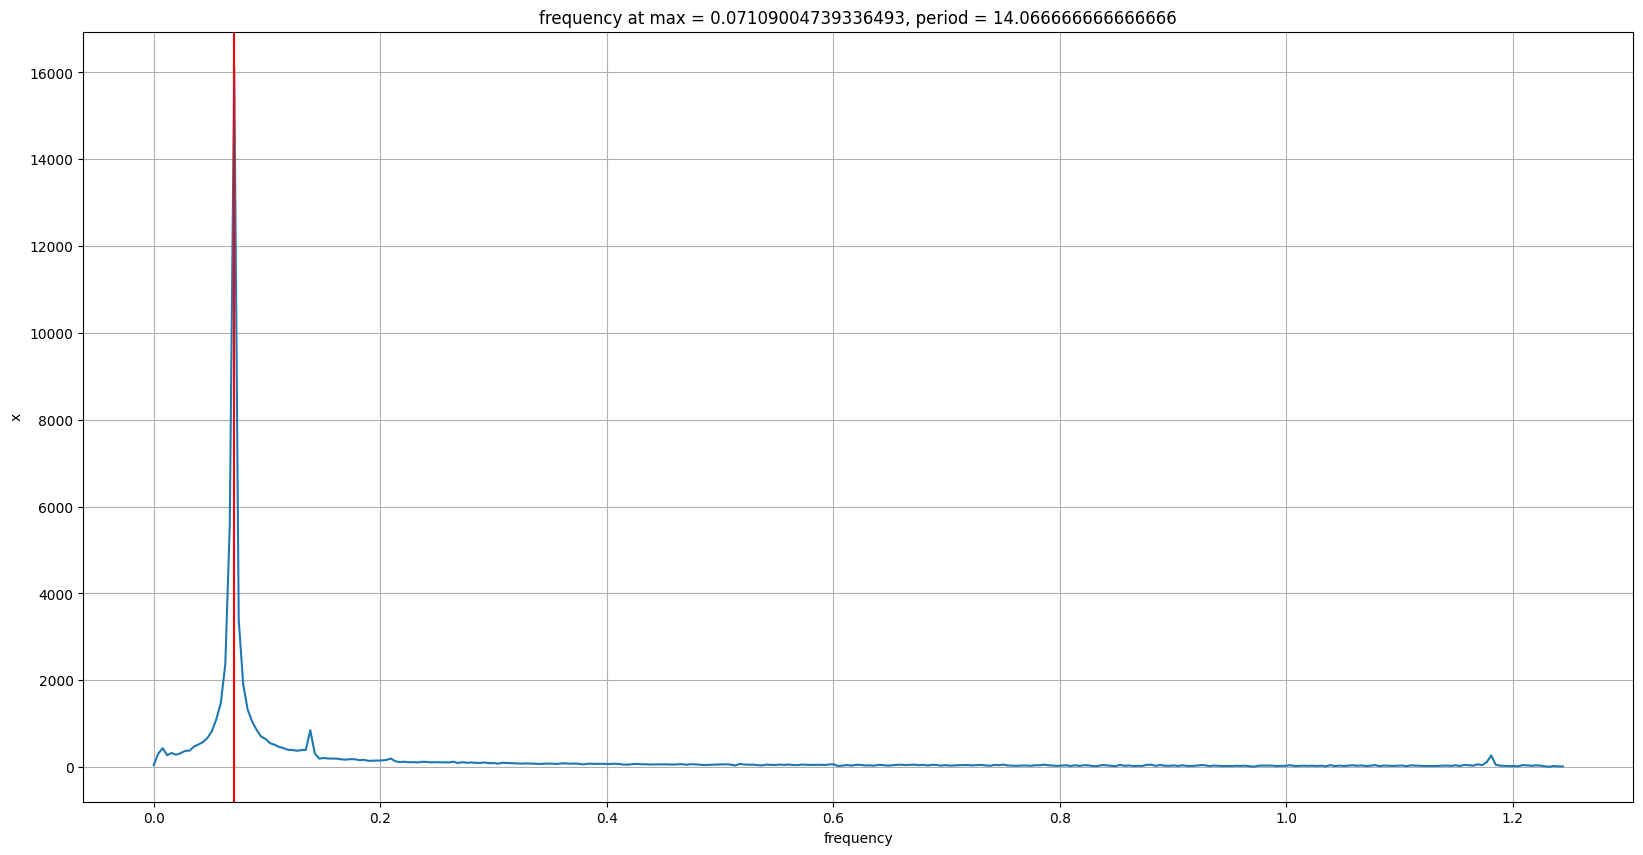

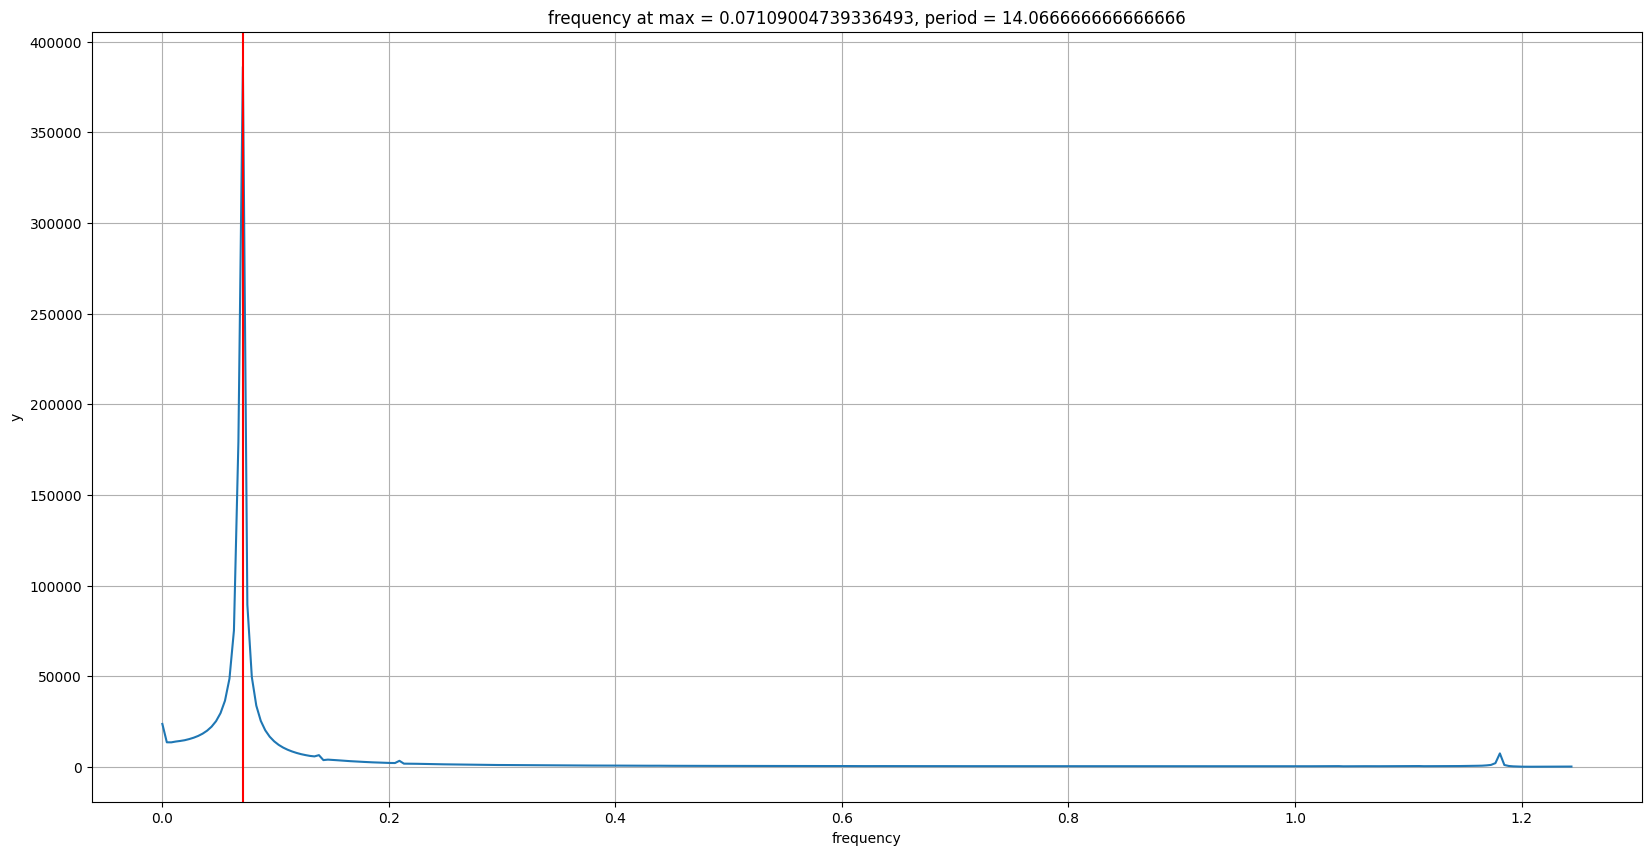

In [41]:
fftx = scipy.fft.fft(x, )
ffty = scipy.fft.fft(y)

#calculate fe moyen
fe = 1/0.4
N = len(x)

print(fe)
freqx = scipy.fft.fftfreq(N, 0.400)
freqy = scipy.fft.fftfreq(N, 0.400)

fmaxX = freqx[np.argmax(np.abs(fftx))]
fmaxY = freqy[np.argmax(np.abs(ffty))]

print(fmaxX)
print(fmaxY)

plt.figure(figsize=(20, 10))
plt.plot(freqx[0:N//2], np.abs(fftx[0:N//2]))
# plot a vertical line at the maximum frequency
plt.axvline(fmaxX, color='red')
plt.xlabel('frequency')
plt.ylabel('x')
plt.title(f"frequency at max = {fmaxX}, period = {1/fmaxX}")
plt.grid()
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(freqy[0:N//2], np.abs(ffty[0:N//2]))
plt.axvline(fmaxY, color='red')
plt.xlabel('frequency')
plt.ylabel('y')
plt.title(f"frequency at max = {fmaxY}, period = {1/fmaxY}")
plt.grid()
plt.show()


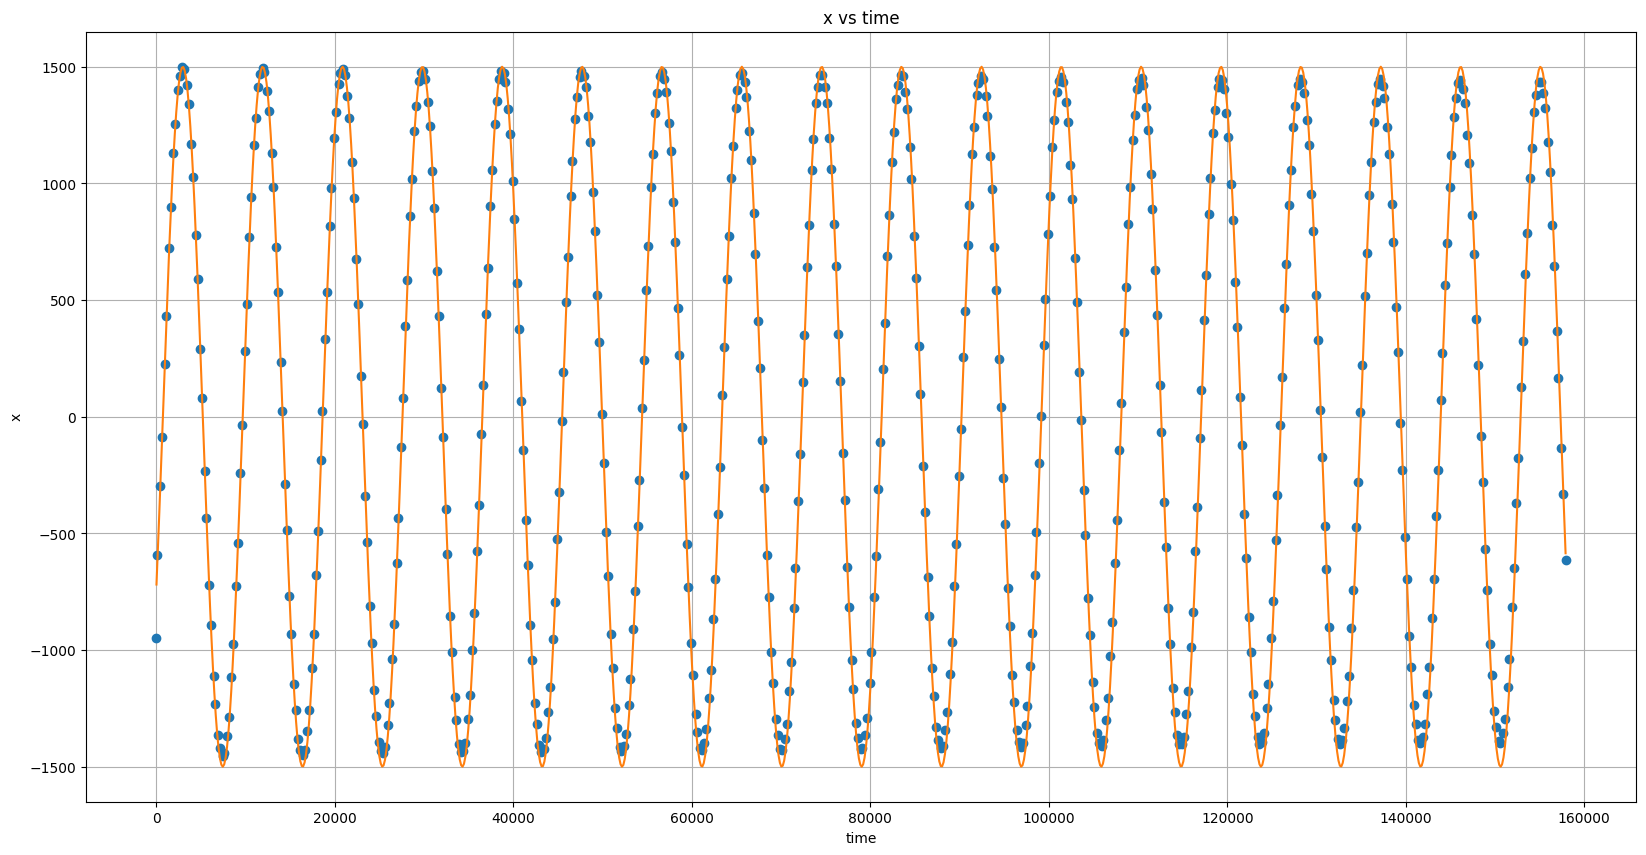

In [51]:
# generate a sine with the same frequency as the max frequency of the x signal and same fe
t = np.linspace(0, np.max(time), 1000)
sine = 1500*np.sin(2 * np.pi * 1/8.95 * t/1000-0.5)

plt.figure(figsize=(20, 10))
plt.plot(time, y, 'o')
plt.plot(t, sine)
plt.xlabel('time')
plt.ylabel('x')
plt.title('x vs time')
plt.grid()